In [12]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_excel('titanic.xls')
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


## the general proportion of survived passengers

In [10]:
df['survived'].value_counts(normalize=True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

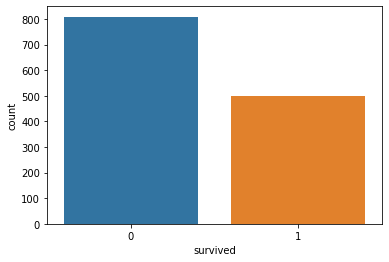

In [14]:
sns.countplot(x = 'survived', data=df);

## class destribution

In [11]:
df['pclass'].value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: pclass, dtype: float64

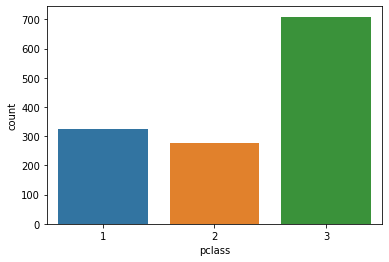

In [15]:
sns.countplot(x = 'pclass', data=df);

## sex  distribution

In [16]:
df['sex'].value_counts(normalize=True)

male      0.644003
female    0.355997
Name: sex, dtype: float64

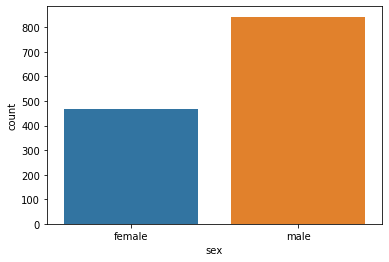

In [17]:
sns.countplot(x = 'sex', data=df);

## mean and standard deviation of the fare

In [20]:
df['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

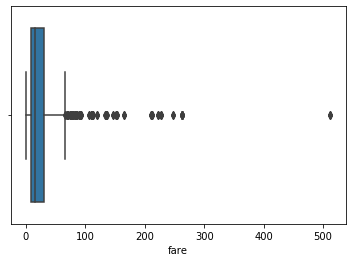

In [25]:
sns.boxplot(x='fare', data=df);

In [18]:
df['fare'].mean()

33.29547928134572

In [21]:
df['fare'].std()

51.758668239174135

## how does the mean male age and female age change in dependence on the service class

In [36]:
df[df['sex'] == 'female'].pivot_table(values=['age'], index=['pclass'], aggfunc='mean')

,age
pclass,
1,37.037594
2,27.499191
3,22.185307


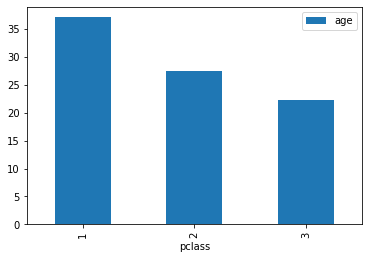

In [37]:
df[df['sex'] == 'female'].pivot_table(values=['age'], index=['pclass'], aggfunc='mean').plot.bar()

## Display a pivot table of survival rates with hierarchical index [service class, sex] and column [Port of Embarkation]

In [45]:
df.pivot_table(values=['survived'],index=['pclass', 'sex'], columns=['embarked'], aggfunc='mean')

survived                    
embarked              C         Q         S
pclass sex                                 
1      female  0.971831  1.000000  0.956522
       male    0.400000  0.000000  0.305556
2      female  1.000000  1.000000  0.870968
       male    0.294118  0.000000  0.134228
3      female  0.709677  0.589286  0.395349
       male    0.214286  0.122807  0.144809

## Women survived more frequently

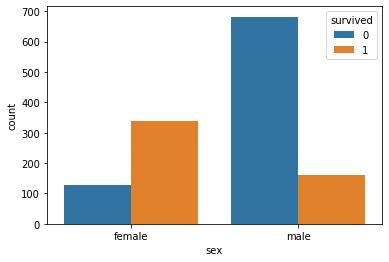

In [30]:
sns.countplot(x = 'sex', hue='survived', data=df);

In [38]:
df.groupby('sex')['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

## Age and survival rate

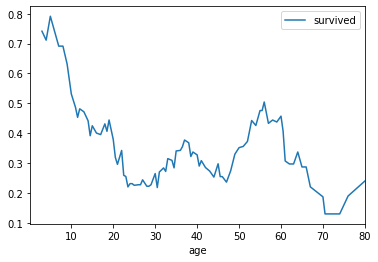

In [41]:
df.pivot_table('survived', index=['age']).rolling(10).mean().plot()

## Fare and survival rate

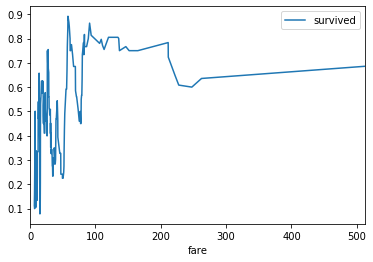

In [42]:
df.pivot_table('survived', index=['fare']).rolling(10).mean().plot()

## most popular man name

In [44]:
df[df['sex'] == 'male']['name'].str.extract('(Mr\. |Miss\. |Master. |Mrs\.[A-Za-z ]*\()([A-Za-z]*)')[1].value_counts().index[0]

'William'